# The risk of diabetes increases with age

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import stan
import csv

In [24]:
import nest_asyncio #this library is important to use pystan

nest_asyncio.apply()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
import scipy.stats as stats

In [27]:
## import data

df = pd.read_csv('../db/diabetes.csv')

/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_51749/2951306314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DiabetesPedigreeFunction,color='r')


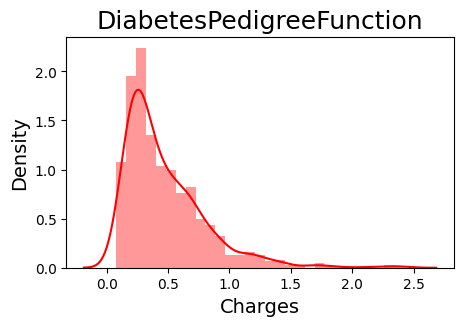

In [28]:
plt.figure(figsize=(5,3))
sns.distplot(df.DiabetesPedigreeFunction,color='r')
plt.title('DiabetesPedigreeFunction',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

In [33]:
train, test = train_test_split(df, test_size=0.3)

In [34]:
## normal distribution

stan_code = """

data {
int<lower=0> N;
vector[N] y;
vector[N] ages;
}

parameters {
real alpha;
real beta_age;
real <lower=0> sigma;
}

model {
//prior 
vector[N] mu;
alpha ~ normal(0,10);
beta_age~ normal(0,10);
sigma ~ cauchy(0,5);

mu = ages * beta_age + alpha;

//model
y ~ normal(mu, sigma);
}

generated quantities {
//predictive posterior check

vector[N] y_rep;

for(n in 1:N){

y_rep[n] = normal_rng(ages[n] * beta_age + alpha, sigma);

}
}
"""

In [35]:
## train

train_data = {
"N": len(train), 
"ages": train.loc[:, "Age"].values,
 "y": train.loc[:, "DiabetesPedigreeFunction"].values,   
}

In [36]:
stan_model = stan.build(stan_code, data=train_data)

Building: found in cache, done.


In [37]:
fit = stan_model.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   7% (400/6000)
Sampling:  32% (1900/6000)
Sampling:  57% (3400/6000)
Sampling:  82% (4900/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_tc5mipih/model_ho5vr4zi.stan', line 25, c

In [38]:
fit.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,sigma,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,336.234788,0.943252,0.079306,5.0,35.0,0.0,-335.081223,0.447703,0.000712,0.339467,...,0.774830,0.569851,0.818859,0.071521,0.583634,0.130685,0.631421,0.223386,0.061174,0.856405
1,335.157220,0.914721,0.079657,4.0,31.0,0.0,-332.070217,0.414140,0.000626,0.332852,...,0.449471,0.601526,0.542472,0.041761,0.931588,0.588766,0.487119,0.821540,0.557391,-0.029641
2,337.158334,0.993905,0.076263,5.0,35.0,0.0,-336.495638,0.426414,0.000906,0.332031,...,0.518724,-0.033783,0.038690,1.012426,0.429250,0.084407,0.334096,-0.378305,0.690027,0.214522
3,336.536278,0.912704,0.071134,5.0,47.0,0.0,-335.518368,0.443253,0.000420,0.336938,...,1.071400,0.193459,-0.232701,0.260979,-0.132136,0.412874,0.826669,0.461515,0.296018,0.055792
4,336.303189,0.899028,0.079306,6.0,63.0,0.0,-334.957506,0.404787,0.002224,0.329879,...,0.637037,0.434161,0.578941,-0.155131,0.941161,-0.058200,0.266912,0.424358,0.261544,0.409483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,336.630092,0.992145,0.071134,5.0,63.0,0.0,-334.272197,0.466731,-0.000213,0.333026,...,0.978401,0.232235,0.346670,0.441681,1.611801,0.808312,0.410531,0.121782,0.541197,0.256392
3996,337.378370,0.999941,0.079306,5.0,31.0,0.0,-336.353501,0.455945,0.000153,0.324809,...,0.343500,0.591817,0.489904,0.551917,0.209821,0.593590,0.333846,0.483468,1.148603,0.092173
3997,335.967225,0.994443,0.079657,4.0,15.0,0.0,-335.722806,0.496032,-0.000763,0.333462,...,0.491412,0.731396,0.492452,0.535031,0.748067,0.507374,0.776015,0.107872,0.748226,0.507583


In [39]:
summary1 = az.summary(fit) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [40]:
summary1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.431,0.042,0.353,0.511,0.001,0.001,1553.0,1291.0,1.0
beta_age,0.001,0.001,-0.001,0.003,0.000,0.000,1669.0,1748.0,1.0
sigma,0.324,0.010,0.305,0.343,0.000,0.000,1344.0,1359.0,1.0
y_rep[0],0.482,0.323,-0.124,1.091,0.005,0.004,4064.0,3874.0,1.0
y_rep[1],0.471,0.330,-0.112,1.113,0.005,0.004,3958.0,3817.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.494,0.331,-0.165,1.069,0.005,0.004,3982.0,3929.0,1.0
y_rep[533],0.453,0.321,-0.146,1.069,0.005,0.004,4047.0,3953.0,1.0
y_rep[534],0.468,0.327,-0.158,1.078,0.005,0.004,4152.0,3772.0,1.0
y_rep[535],0.459,0.327,-0.181,1.050,0.005,0.004,4109.0,3789.0,1.0


<Axes: >

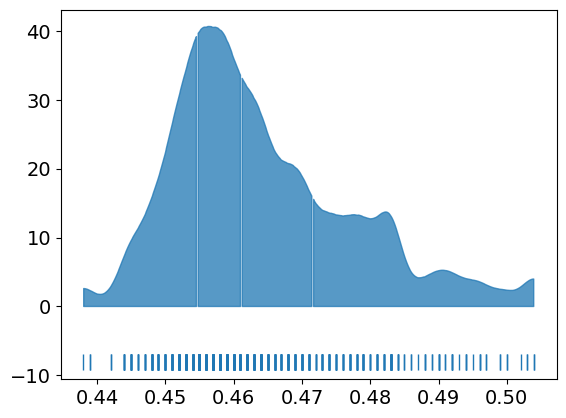

In [41]:
az.plot_dist(summary1['mean'][5:], rug=True, quantiles=[.25, .5, .75])

<Axes: >

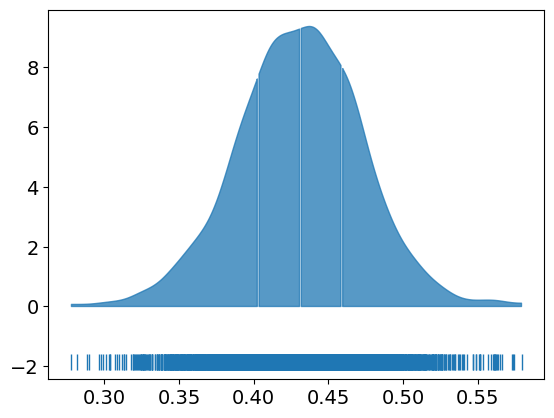

In [42]:
az.plot_dist(fit['alpha'], rug=True, quantiles=[.25, .5, .75])

In [43]:
stan_data_simu_v1 = az.from_pystan(
    posterior=fit,
    posterior_predictive=["y_rep"],
    observed_data=["y"],
    posterior_model=stan_model,
    coords={"y_rep": np.arange(train_data["N"])},
)

<Axes: xlabel='y / y_rep'>

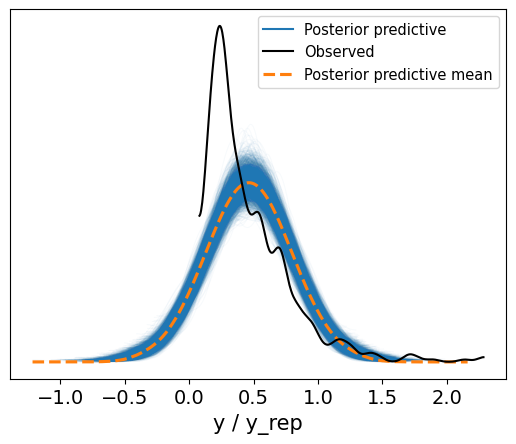

In [44]:
az.plot_ppc(stan_data_simu_v1, data_pairs={"y": "y_rep"}, alpha=0.03, textsize=14)

In [76]:
## normal distribution

stan_code_v2 = """

data {
int<lower=0> N;
vector[N] y;
int<lower=0> ages [N];
}

parameters {
real alpha;
real beta_age;
real <lower=0> sigma;
}

transformed parameters{
vector[N] mu;

mu = alpha + beta_age * to_vector(ages);
}

model {
//prior 

alpha ~ normal(0,10);
beta_age~ normal(0,1);
sigma ~ cauchy(0,5);

//model
y ~ normal(mu, sigma);
}

generated quantities {
//predictive posterior check

vector[N] y_rep;

for(n in 1:N){

y_rep[n] = normal_rng(mu[n], sigma);

}
}
"""

In [88]:
data = {
"N": len(df), 
"ages": df.loc[:, "Age"].values,
"y": df.loc[:, "DiabetesPedigreeFunction"].values,
}

In [89]:
stan_model_v2 = stan.build(stan_code_v2, data=data)

Building: found in cache, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_jgnjbhxk/model_rjvhphrb.stan', line 6, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc


In [90]:
fit_v2 = stan_model_v2.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   7% (400/6000)
Sampling:  32% (1900/6000)
Sampling:  57% (3400/6000)
Sampling:  82% (4900/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.001442 seconds
  1000 transitions using 10 leapfrog steps per transition would take 14.42 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001503 seconds
  1000 transitions using 10 leapfrog steps per transition would take 15.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001464 seconds
  1000 transitions using 10 leapfrog steps per transition would take 14.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001515 seconds
  1000 transitions using 10 leapfrog steps per transition would take 15.15 seconds.
  Adjust your expectations accordingly!


each sample of that parameter (so the sampling method has generated 1000 values for each parameter)

In [91]:
fit_v2.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,sigma,...,y_rep.759,y_rep.760,y_rep.761,y_rep.762,y_rep.763,y_rep.764,y_rep.765,y_rep.766,y_rep.767,y_rep.768
draws,,,,,,,,,,,,,,,,,,,,,
0,463.855324,0.999116,0.061489,2.0,7.0,0.0,-463.202367,0.429622,0.001470,0.328638,...,0.252117,0.376939,0.456560,-0.018524,0.737672,0.882476,0.567302,0.545217,0.725397,0.309097
1,462.753516,0.999426,0.064597,3.0,11.0,0.0,-461.976308,0.384106,0.002434,0.326370,...,0.379070,0.771470,0.565196,0.317587,0.819176,0.605290,0.683975,0.323415,0.452490,0.308439
2,460.527936,0.789660,0.071898,3.0,15.0,0.0,-459.309188,0.401914,0.001148,0.328558,...,-0.051590,0.299588,0.682549,0.087125,0.617233,0.967285,0.321180,0.357070,0.396894,0.261229
3,462.979602,0.939948,0.066572,6.0,63.0,0.0,-460.173731,0.478015,-0.000366,0.337646,...,0.025048,0.473094,0.569197,0.451108,0.326863,-0.133766,0.202472,0.538239,0.693832,0.924208
4,464.140918,0.999775,0.061489,4.0,23.0,0.0,-463.670404,0.434366,0.001180,0.329893,...,0.880740,0.625356,1.076246,1.089054,0.362841,0.656867,0.169133,0.371743,0.799041,0.602233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,463.368219,0.888237,0.066572,4.0,23.0,0.0,-462.538328,0.455310,0.000951,0.333546,...,0.301847,0.242019,0.333738,0.707849,0.405387,0.509786,0.294054,1.215524,0.259883,0.711940
3996,461.458244,0.908737,0.061489,6.0,63.0,0.0,-458.262186,0.500669,-0.001194,0.328351,...,0.788346,-0.086135,0.003778,-0.063373,0.914772,0.579781,0.667494,0.597330,0.037488,0.527907
3997,461.285633,0.695813,0.064597,4.0,31.0,0.0,-454.973920,0.440806,0.000332,0.318534,...,0.943951,0.375103,0.296384,-0.000379,0.045784,0.597026,0.533016,0.625270,0.793996,0.629391


In [92]:
beta_age_m = fit_v2['beta_age'].mean()

In [93]:
beta_age_m

0.0009266401696134062

In [94]:
summary2 = az.summary(fit_v2) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [95]:
summary2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.441,0.036,0.375,0.510,0.001,0.001,1770.0,1863.0,1.0
beta_age,0.001,0.001,-0.001,0.003,0.000,0.000,1889.0,2207.0,1.0
sigma,0.332,0.009,0.315,0.347,0.000,0.000,1497.0,1288.0,1.0
mu[0],0.487,0.021,0.448,0.525,0.000,0.000,2814.0,2680.0,1.0
mu[1],0.470,0.013,0.446,0.493,0.000,0.000,2911.0,2797.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[763],0.493,0.329,-0.117,1.123,0.005,0.004,4024.0,3811.0,1.0
y_rep[764],0.469,0.324,-0.139,1.084,0.005,0.004,4090.0,4098.0,1.0
y_rep[765],0.464,0.336,-0.163,1.107,0.006,0.004,3724.0,3445.0,1.0
y_rep[766],0.492,0.337,-0.153,1.096,0.005,0.004,3986.0,3919.0,1.0


The probability of age increases the risk of diabetes is 0.001

In [45]:
# import the relevant modules
import shutil
import httpstan.models
import httpstan.cache

In [46]:
httpstan.cache.list_model_names()

['models/mcjtshmy', 'models/ho5vr4zi']

In [3]:
httpstan.cache.delete_model_directory('models/mcjtshmy') ## add the model pointer you want to remove